In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model = tf.keras.models.load_model('Pest_trained_model.keras')

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │          54,036 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,519,282 (89.72 MB)

 Trainable params: 7,839,760 (29.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,679,522 (59.81 MB)

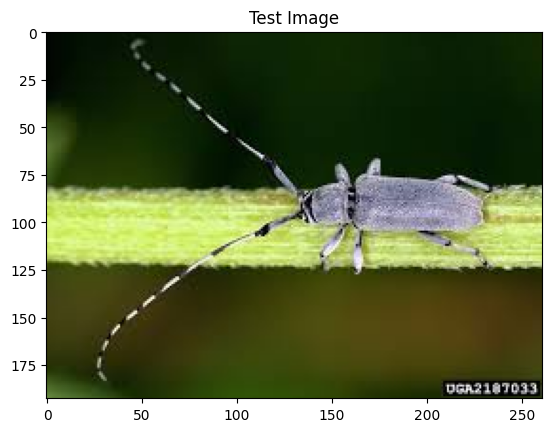

In [8]:
import cv2
image_path = "Pest_Dataset_Split/test/stem_borer/jpg_55 - Copy.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image 
plt.imshow(img)
plt.title("Test Image")
plt.show()

## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [10]:
class_name = ['Beet Armyworm',
 'Black Hairy',
 'Cutworm',
 'Field Cricket',
 'Jute Aphid',
 'Jute Hairy',
 'Jute Red Mite',
 'Jute Semilooper',
 'Jute Stem Girdler',
 'Jute Stem Weevil',
 'Leaf Beetle',
 'Mealybug',
 'Pod Borer',
 'Scopula Emissaria',
 'Termite',
 'Termite odontotermes (Rambur)',
 'Yellow Mite',
 'ants',
 'aphids',
 'armyworm',
 'bees',
 'beetle',
 'bollworm',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'mites',
 'mosquito',
 'moth',
 'sawfly',
 'slug',
 'snail',
 'stem_borer',
 'wasp',
 'weevil']

In [11]:
pest_info = {
    "Beet Armyworm": {
        "description": "A caterpillar pest that feeds on leaves, causing extensive defoliation in crops.",
        "cure": "Use biological control agents like parasitoid wasps and apply insecticides if needed."
    },
    "Black Hairy": {
        "description": "A type of caterpillar with black, hairy bodies that damage plant leaves.",
        "cure": "Manually remove larvae, encourage natural predators, or use organic pesticides."
    },
    "Cutworm": {
        "description": "Larvae that cut young plants at the base, causing severe damage to seedlings.",
        "cure": "Apply insecticides around plant bases and use protective collars on young plants."
    },
    "Field Cricket": {
        "description": "An insect that feeds on plant roots and seedlings, affecting crop growth.",
        "cure": "Reduce weeds and organic debris; use baits and natural predators."
    },
    "Jute Aphid": {
        "description": "Aphids that suck plant sap, weakening plants and spreading viral diseases.",
        "cure": "Use neem oil, insecticidal soaps, or encourage natural predators like ladybugs."
    },
    "Jute Hairy": {
        "description": "Hairy caterpillars that feed on jute leaves, reducing yield.",
        "cure": "Use biopesticides and remove infested leaves manually."
    },
    "Jute Red Mite": {
        "description": "Tiny red mites that suck plant juices, causing discoloration and stunted growth.",
        "cure": "Spray with miticides or neem oil; ensure proper irrigation."
    },
    "Jute Semilooper": {
        "description": "A caterpillar that feeds on jute leaves, leading to defoliation.",
        "cure": "Apply biological control agents like Trichogramma or use selective pesticides."
    },
    "Jute Stem Girdler": {
        "description": "A pest that bores into jute stems, weakening plants.",
        "cure": "Destroy infested plants and apply insecticides early in the season."
    },
    "Jute Stem Weevil": {
        "description": "A pest that tunnels into jute stems, reducing fiber yield.",
        "cure": "Use resistant jute varieties and apply neem-based insecticides."
    },
    "Leaf Beetle": {
        "description": "Beetles that chew plant leaves, causing skeletonization.",
        "cure": "Handpick beetles, apply neem oil, or use pyrethroid insecticides."
    },
    "Mealybug": {
        "description": "Sap-sucking insects that weaken plants and excrete honeydew, leading to sooty mold growth.",
        "cure": "Introduce ladybugs, apply insecticidal soap, or use neem oil."
    },
    "Pod Borer": {
        "description": "Caterpillars that bore into seed pods, reducing crop yield.",
        "cure": "Use pheromone traps and apply biopesticides like Bacillus thuringiensis."
    },
    "Scopula Emissaria": {
        "description": "A moth species whose larvae feed on plant leaves.",
        "cure": "Apply biological control agents and maintain crop hygiene."
    },
    "Termite": {
        "description": "Wood and root-feeding insects that weaken plant structures.",
        "cure": "Apply termiticides or use natural predators like ants and nematodes."
    },
    "Termite odontotermes (Rambur)": {
        "description": "A specific termite species that damages crops and wooden structures.",
        "cure": "Use soil treatments with termiticides and encourage predatory insects."
    },
    "Yellow Mite": {
        "description": "Tiny mites that cause leaf curling and discoloration.",
        "cure": "Use sulfur-based miticides or neem oil sprays."
    },
    "ants": {
        "description": "Some ant species farm aphids, indirectly harming plants.",
        "cure": "Use ant baits and keep aphid populations under control."
    },
    "aphids": {
        "description": "Small sap-sucking insects that weaken plants and spread diseases.",
        "cure": "Use insecticidal soap, neem oil, or natural predators like ladybugs."
    },
    "armyworm": {
        "description": "Caterpillars that rapidly consume crops, causing widespread damage.",
        "cure": "Use pheromone traps, biological control agents, and chemical sprays if necessary."
    },
    "bees": {
        "description": "Pollinators that do not harm plants but can be a nuisance in certain cases.",
        "cure": "Avoid pesticide use; relocate hives if needed."
    },
    "beetle": {
        "description": "Various beetle species that chew leaves and stems.",
        "cure": "Use neem oil, pyrethrin-based sprays, or handpick beetles."
    },
    "bollworm": {
        "description": "Caterpillars that attack cotton and other crops by feeding on bolls.",
        "cure": "Use pheromone traps and apply Bt-based insecticides."
    },
    "catterpillar": {
        "description": "Larval stage of moths and butterflies that eat plant leaves.",
        "cure": "Encourage natural predators and use organic insecticides."
    },
    "earthworms": {
        "description": "Beneficial decomposers that improve soil health.",
        "cure": "No control needed; earthworms are beneficial to plants."
    },
    "earwig": {
        "description": "Nocturnal insects that feed on soft plant tissues.",
        "cure": "Use traps and organic repellents."
    },
    "grasshopper": {
        "description": "Pests that consume large amounts of plant foliage.",
        "cure": "Use natural predators or apply insecticides selectively."
    },
    "mites": {
        "description": "Tiny arachnids that suck plant sap, causing leaf damage.",
        "cure": "Apply neem oil or miticides."
    },
    "mosquito": {
        "description": "Not a plant pest but a carrier of human diseases.",
        "cure": "Use mosquito repellents and eliminate standing water."
    },
    "moth": {
        "description": "Adult moths are harmless, but their larvae damage crops.",
        "cure": "Use pheromone traps and biological controls."
    },
    "sawfly": {
        "description": "Larvae that resemble caterpillars and chew on plant leaves.",
        "cure": "Apply neem oil or handpick larvae."
    },
    "slug": {
        "description": "Mollusks that eat tender plant parts and leaves.",
        "cure": "Use slug traps, diatomaceous earth, or copper barriers."
    },
    "snail": {
        "description": "Mollusks that damage plant leaves and stems.",
        "cure": "Apply organic repellents and remove snails manually."
    },
    "stem_borer": {
        "description": "Larvae that tunnel into plant stems, weakening them.",
        "cure": "Use resistant varieties and apply appropriate insecticides."
    },
    "wasp": {
        "description": "Predatory insects that can be beneficial or harmful depending on the species.",
        "cure": "Relocate hives if necessary, avoid disturbing nests."
    },
    "weevil": {
        "description": "Beetles that damage stored grains and crops.",
        "cure": "Use natural predators and store grains in airtight containers."
    }
}


In [12]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


(array([[1.5408131e-07, 6.9773187e-10, 1.7388727e-07, 6.4177549e-08,
         7.4953924e-08, 1.3957997e-09, 3.4860234e-10, 2.7682429e-10,
         4.5941756e-10, 1.4349449e-08, 1.2888302e-08, 2.5015874e-05,
         1.1954151e-09, 1.6990306e-09, 2.0076417e-12, 4.3321562e-11,
         1.3719684e-08, 1.7971666e-07, 3.4375085e-09, 2.1067365e-07,
         9.5972901e-08, 4.4710869e-06, 7.4681327e-07, 1.4108893e-05,
         5.0152174e-08, 3.9845332e-08, 1.7643470e-07, 2.6156607e-10,
         2.3963420e-09, 2.5652739e-07, 2.6236730e-08, 7.3062488e-08,
         9.9787610e-07, 9.9995303e-01, 7.2785382e-09, 3.6030638e-08]],
       dtype=float32),
 (1, 36))

In [13]:
result_index = np.argmax(prediction)
result_index

33

In [14]:

# Get predicted pest
predicted_pest = class_name[result_index]

In [15]:
# Get disease details
description = pest_info.get(predicted_pest, {}).get("description", "No description available.")
cure = pest_info.get(predicted_pest, {}).get("cure", "No cure information available.")

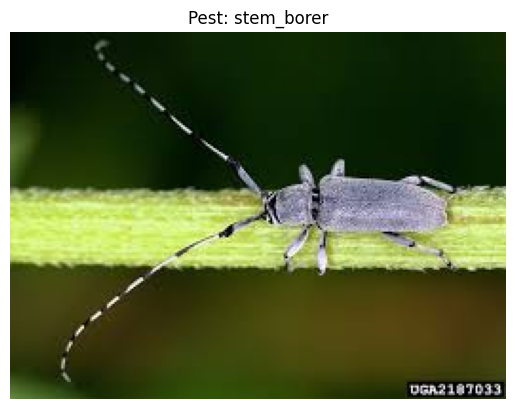

Predicted Pest: stem_borer
Description: Larvae that tunnel into plant stems, weakening them.
Cure: Use resistant varieties and apply appropriate insecticides.


In [17]:
# Display the results
plt.imshow(img)
plt.title(f"Pest: {predicted_pest}")
plt.axis("off")
plt.show()

print(f"Predicted Pest: {predicted_pest}")
print(f"Description: {description}")
print(f"Cure: {cure}")